In [1]:
import sys
assert  sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>="0.20"

In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    print('import error')

import error


In [3]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

# 感知机

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

pre_clf=Perceptron(max_iter=100,tol=1e-3,random_state=42)
pre_clf.fit(X,y)

y_pred=pre_clf.predict([[2,0.5],[3,0.2]])

In [6]:
y_pred

array([1, 0])

In [7]:
pre_clf.coef_,pre_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

(0.0, 5.0, 0.0, 2.0)

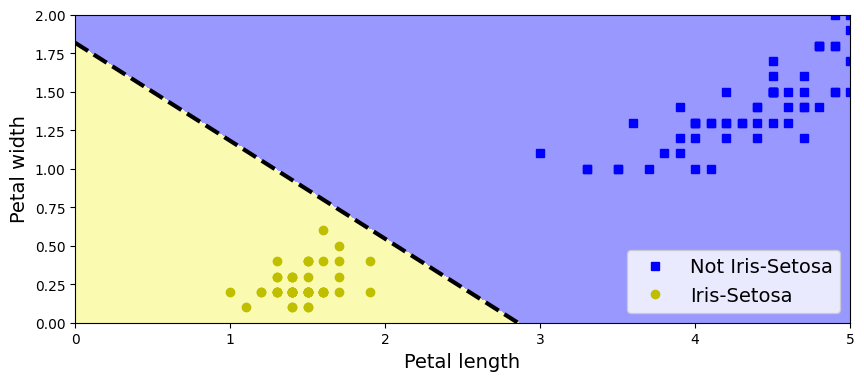

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

a=-pre_clf.coef_[0][0]/pre_clf.coef_[0][1]
b=-pre_clf.intercept_[0]/pre_clf.coef_[0][1]

axes=[0,5,0,2]
plt.plot([axes[0],axes[1]],[a*axes[0]+b,a*axes[1]+b],'k--',linewidth=3)
x0,x1=np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],200).reshape(-1,1),
)
X_new=np.c_[x0.ravel(),x1.ravel()]
y_predict=pre_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
from matplotlib.colors import ListedColormap
custon_cmap=ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0,x1,zz,cmap=custon_cmap)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.axis(axes)

In [9]:
x0

array([[0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       ...,
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ]])

In [10]:
x1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01005025, 0.01005025, 0.01005025, ..., 0.01005025, 0.01005025,
        0.01005025],
       [0.0201005 , 0.0201005 , 0.0201005 , ..., 0.0201005 , 0.0201005 ,
        0.0201005 ],
       ...,
       [1.9798995 , 1.9798995 , 1.9798995 , ..., 1.9798995 , 1.9798995 ,
        1.9798995 ],
       [1.98994975, 1.98994975, 1.98994975, ..., 1.98994975, 1.98994975,
        1.98994975],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

In [11]:
def heaviside(z):
    return (z>=0).astype(z.dtype)

def mlp_xor(x1,x2,activation=heaviside):
    return  activation(-activation(x1+x2-1.5)+activation(x1+x2-0.5)-0.5)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

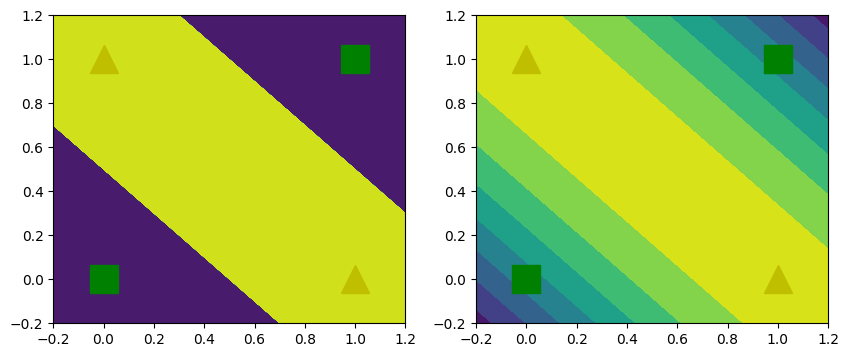

In [12]:
x1s=np.linspace(-0.2,1.2,1000)
x2s=x1s.copy()

x1,x2=np.meshgrid(x1s,x2s)

z1=mlp_xor(x1,x2,activation=heaviside)
z2=mlp_xor(x1,x2,activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1,x2,z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)

plt.subplot(122)
plt.contourf(x1,x2,z2)

plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)

# 使用Keras实现图像分类

In [13]:
from tensorflow import keras

In [14]:
keras.__version__

'2.5.0'

In [15]:
tf.__version__

'2.5.3'

In [16]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [17]:
X_train_full.shape,X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [18]:
X_train,X_valid=X_train_full[5000:]/255.,X_train_full[:5000]/255.
y_train,y_valid=y_train_full[5000:],y_train_full[:5000]
X_test=X_test/255.

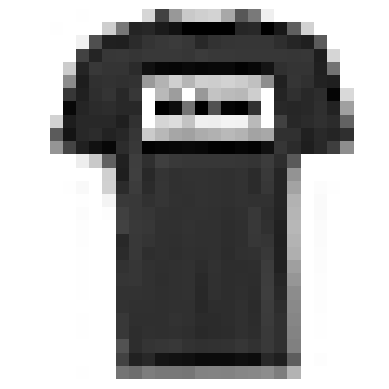

'T-shirt/top'

In [19]:
ID=1
plt.imshow(X_train_full[ID],cmap='binary')
plt.axis('off')
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train_full[ID]]

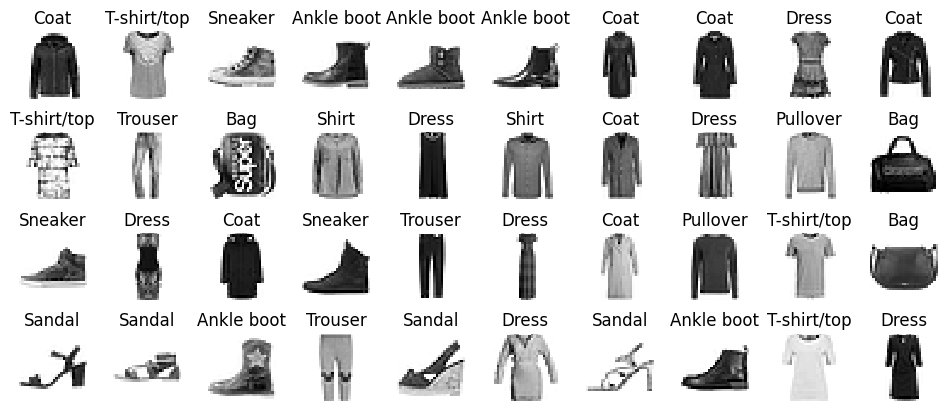

In [20]:
N_ROWS=4
N_COLS=10
plt.figure(figsize=(N_COLS*1.2,N_ROWS*1.2))
for row in range(N_ROWS):
    for col in range(N_COLS):
        index=N_COLS*row+col
        plt.subplot(N_ROWS,N_COLS,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [21]:
#使用顺序API构建图像分类器
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [24]:
model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
keras.utils.plot_model(model,'my_fashion_mnist_model.png',show_shapes=True)

AttributeError: module 'os' has no attribute 'errno'

In [26]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

In [28]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [33]:
history=model.fit(X_train,y_train,epochs=30,batch_size=10,validation_data=(X_valid,y_valid))

Epoch 1/30
5500/5500 [==============================] - 8s 1ms/step - loss: 0.2760 - accuracy: 0.8974 - val_loss: 0.3335 - val_accuracy: 0.8772
Epoch 2/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2605 - accuracy: 0.9039 - val_loss: 0.3051 - val_accuracy: 0.8874
Epoch 3/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2499 - accuracy: 0.9079 - val_loss: 0.4102 - val_accuracy: 0.8518
Epoch 4/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2389 - accuracy: 0.9130 - val_loss: 0.3014 - val_accuracy: 0.8938
Epoch 5/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2314 - accuracy: 0.9152 - val_loss: 0.2865 - val_accuracy: 0.8942
Epoch 6/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2229 - accuracy: 0.9175 - val_loss: 0.3055 - val_accuracy: 0.8930
Epoch 7/30
5500/5500 [==============================] - 7s 1ms/step - loss: 0.2173 - accuracy: 0.9206 - val_loss: 0.3008 - val_accuracy:

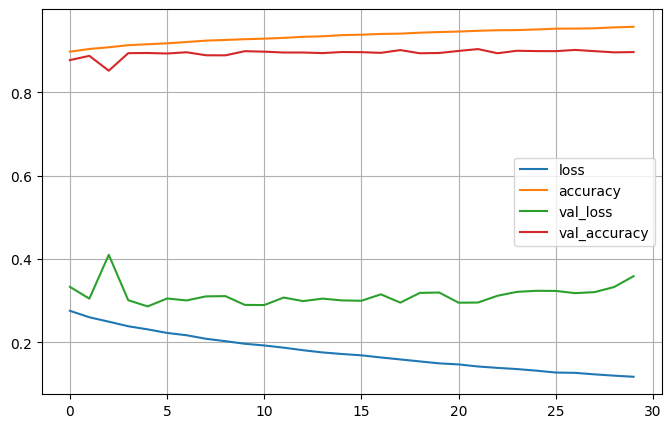

In [34]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [36]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8842


[0.404535174369812, 0.8841999769210815]

In [40]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)
y_pred=np.argmax(y_proba,axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')